#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read Data

In [2]:
data = pd.read_csv('hour.csv')

In [3]:
data.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Preliminary analysis and feature selection.


In [4]:
df = data.copy(deep =True)
df = df.drop(columns=['index','date','casual','registered'],axis=1)
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


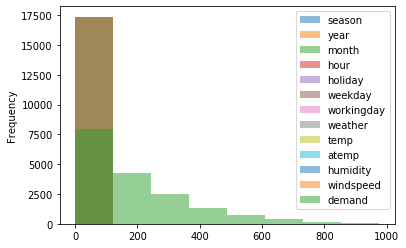

In [5]:
df.plot.hist(bins=8,alpha=0.5)

In [6]:
df.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

##### Histogram for all selected features

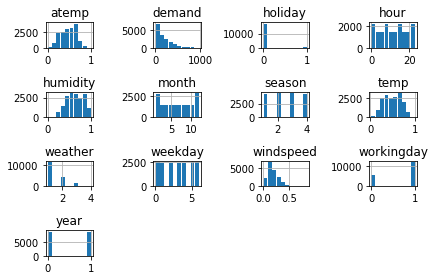

In [7]:
df.hist(rwidth=0.9)
plt.tight_layout()

#### Data Visualization 

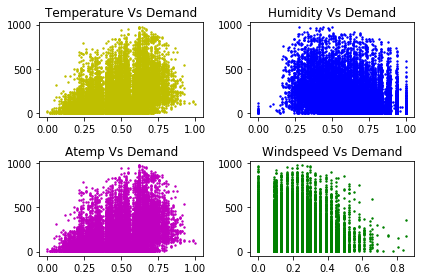

In [8]:
# Visualise the continuous features Vs demand

plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(df['atemp'], df['demand'], s=2, c='y')

plt.subplot(2,2,2)
plt.title('Humidity Vs Demand')
plt.scatter(df['humidity'], df['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Atemp Vs Demand')
plt.scatter(df['atemp'], df['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(df['windspeed'], df['demand'], s=2, c='g')

plt.tight_layout()



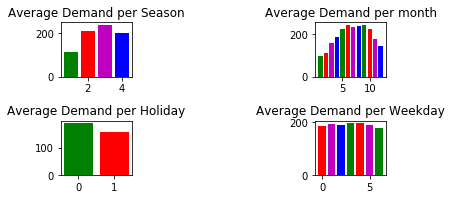

In [9]:
# Visualise the categorical features
colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = df['season'].unique()
cat_average = df.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per month')
cat_list = df['month'].unique()
cat_average = df.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Holiday')
cat_list = df['holiday'].unique()
cat_average = df.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per Weekday')
cat_list = df['weekday'].unique()
cat_average = df.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)



plt.tight_layout()

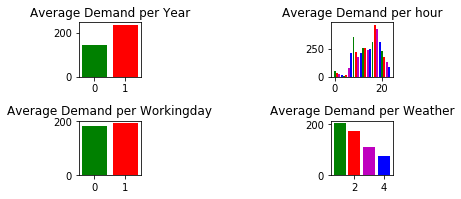

In [10]:
plt.subplot(3,3,1)
plt.title('Average Demand per Year')
cat_list = df['year'].unique()
cat_average = df.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per hour')
cat_list = df['hour'].unique()
cat_average = df.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Workingday')
cat_list = df['workingday'].unique()
cat_average = df.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per Weather')
cat_list = df['weather'].unique()
cat_average = df.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

#### Check multiple linear regression assumption(print correlation coefficient matrix)

In [11]:
df.corr()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
year,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
month,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hour,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weather,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929


#### Dropping irrelevant features 

In [12]:
df1=df.drop(columns=['temp','windspeed','weekday','holiday','workingday'],axis=1)
df1

,season,year,month,hour,weather,atemp,humidity,demand
0,1,0,1,0,1,0.2879,0.81,16
1,1,0,1,1,1,0.2727,0.80,40
2,1,0,1,2,1,0.2727,0.80,32
3,1,0,1,3,1,0.2879,0.75,13
4,1,0,1,4,1,0.2879,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,1,12,19,2,0.2576,0.60,119
17375,1,1,12,20,2,0.2576,0.60,89
17376,1,1,12,21,1,0.2576,0.60,90
17377,1,1,12,22,1,0.2727,0.56,61


In [13]:
df1.demand.dtypes

dtype('int64')

#### Plotting auto correlation

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x20ad9df48c8>)

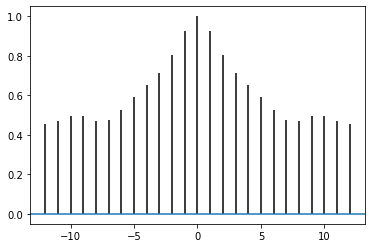

In [14]:
plt.acorr(pd.to_numeric(df1.demand, downcast='float'), maxlags=12)

In [15]:
df1['demand'] = np.log(df1['demand'])
df1

,season,year,month,hour,weather,atemp,humidity,demand
0,1,0,1,0,1,0.2879,0.81,2.772589
1,1,0,1,1,1,0.2727,0.80,3.688879
2,1,0,1,2,1,0.2727,0.80,3.465736
3,1,0,1,3,1,0.2879,0.75,2.564949
4,1,0,1,4,1,0.2879,0.75,0.000000
...,...,...,...,...,...,...,...,...
17374,1,1,12,19,2,0.2576,0.60,4.779123
17375,1,1,12,20,2,0.2576,0.60,4.488636
17376,1,1,12,21,1,0.2576,0.60,4.499810
17377,1,1,12,22,1,0.2727,0.56,4.110874


#### Create or modify new features solve the problem of autocorrelation

In [16]:
df1['t1']=df1['demand'].shift(1,axis=0)
df1['t2']=df1['demand'].shift(2,axis=0)
df1['t3']=df1['demand'].shift(3,axis=0)
df2 = df1.dropna()
df2

,season,year,month,hour,weather,atemp,humidity,demand,t1,t2,t3
3,1,0,1,3,1,0.2879,0.75,2.564949,3.465736,3.688879,2.772589
4,1,0,1,4,1,0.2879,0.75,0.000000,2.564949,3.465736,3.688879
5,1,0,1,5,2,0.2576,0.75,0.000000,0.000000,2.564949,3.465736
6,1,0,1,6,1,0.2727,0.80,0.693147,0.000000,0.000000,2.564949
7,1,0,1,7,1,0.2576,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,2,0.2576,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,1,12,20,2,0.2576,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,1,12,21,1,0.2576,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,1,12,22,1,0.2727,0.56,4.110874,4.499810,4.488636,4.779123


#### Creating dummy variables

In [17]:
df2['season'] = df2['season'].astype('category')
df2['year'] = df2['year'].astype('category')
df2['month'] = df2['month'].astype('category')
df2['hour'] = df2['hour'].astype('category')
df2['weather'] = df2['weather'].astype('category')

df2 = pd.get_dummies(df2, drop_first=True)
df2

C:\Users\vishn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vishn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vishn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,atemp,humidity,demand,t1,t2,t3,season_2,season_3,season_4,year_1,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_2,weather_3,weather_4
3,0.2879,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.2879,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.2576,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.2727,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.2576,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.2576,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
17375,0.2576,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
17376,0.2576,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
17377,0.2727,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


#### Create train and test split

In [18]:
x = df2.drop(columns='demand')
y = df2['demand']

In [19]:
x

,atemp,humidity,t1,t2,t3,season_2,season_3,season_4,year_1,month_2,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_2,weather_3,weather_4
3,0.2879,0.75,3.465736,3.688879,2.772589,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.2879,0.75,2.564949,3.465736,3.688879,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.2576,0.75,0.000000,2.564949,3.465736,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.2727,0.80,0.000000,0.000000,2.564949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.2576,0.86,0.693147,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.2576,0.60,4.804021,5.099866,5.365976,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
17375,0.2576,0.60,4.779123,4.804021,5.099866,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
17376,0.2576,0.60,4.488636,4.779123,4.804021,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
17377,0.2727,0.56,4.499810,4.488636,4.779123,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
y

3        2.564949
4        0.000000
5        0.000000
6        0.693147
7        1.098612
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17376, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#### Fit and Score the model using Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.score(x_test,y_test)

0.932380847498296

#### Create Y prediction and compare the result

In [26]:
y_predict = model.predict(x_test)
y_predict

array([4.4533238 , 6.62326061, 5.4063724 , ..., 3.22972522, 5.14213873,
       5.23746297])

In [27]:
import math
from sklearn.metrics import mean_squared_error
rmse  = math.sqrt(mean_squared_error(y_test,y_predict))
rmse

0.3888467812896179